<a href="https://colab.research.google.com/github/Kirti-Pant/X-RVV-/blob/main/Testing_of_Hybrid_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Hybrid model on Test Data

In [ ]:
test_loss, test_accuracy = classification_model.evaluate(test_ds)
print(f" Test Accuracy: {test_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9955 - loss: 0.0116
 Test Accuracy: 0.9964


In [ ]:
test_loss, test_accuracy = classification_model.evaluate(test_ds)
print(f" Test Accuracy: {test_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9955 - loss: 0.0116
 Test Accuracy: 0.9964


In [ ]:
from sklearn.metrics import classification_report

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

      glioma     1.0000    1.0000    1.0000        72
  meningioma     0.9878    1.0000    0.9939        81
    no_tumor     1.0000    0.9722    0.9859        36
   pituitary     1.0000    1.0000    1.0000        89

    accuracy                         0.9964       278
   macro avg     0.9970    0.9931    0.9949       278
weighted avg     0.9964    0.9964    0.9964       278



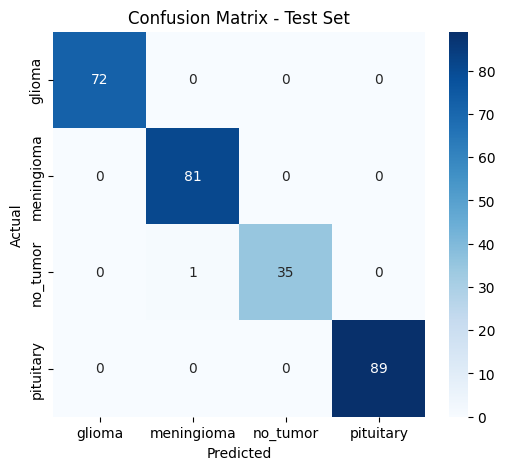

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


AUC Score (One-vs-Rest): 0.9999
AUC Score (Macro Average): 0.9999
AUC Score (Weighted Average): 0.9999

AUC per Class:
AUC for class 'glioma': 1.0000
AUC for class 'meningioma': 0.9999
AUC for class 'no_tumor': 0.9999
AUC for class 'pituitary': 1.0000


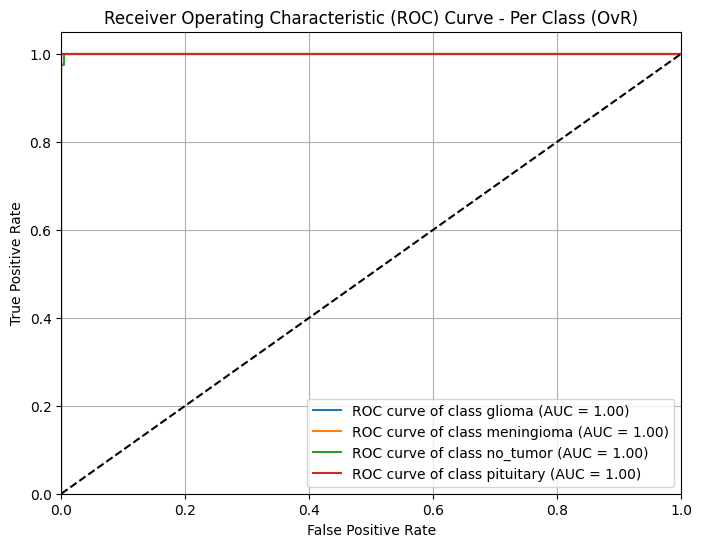

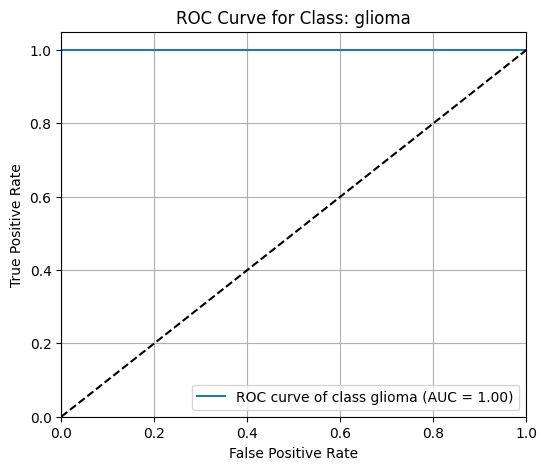

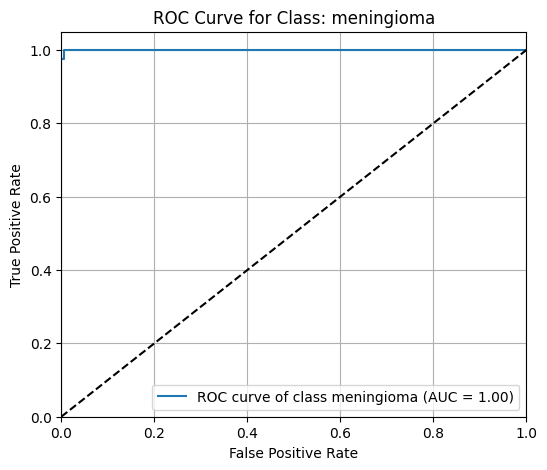

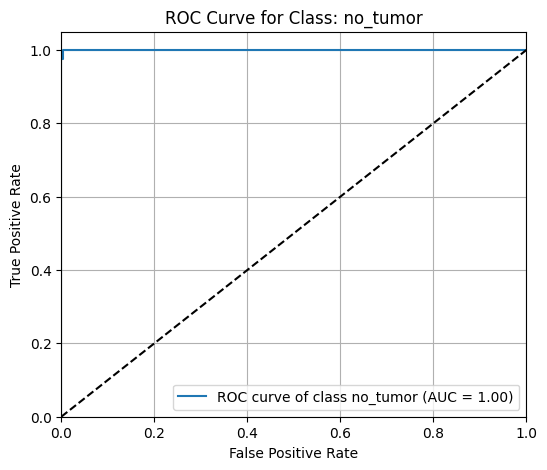

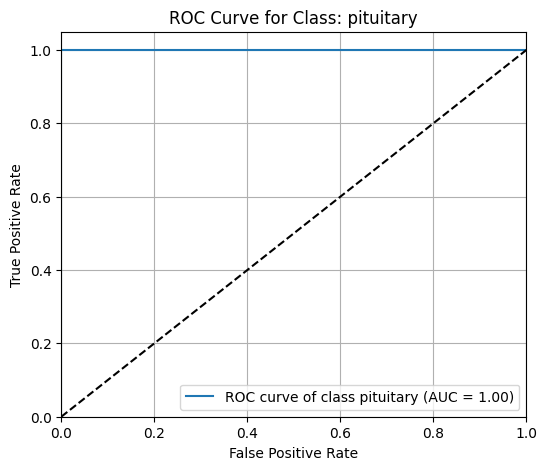

In [ ]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



y_true_auc = []
y_prob = []


for images, labels in test_ds:

    probs = classification_model.predict(images, verbose=0)

    y_true_auc.extend(tf.argmax(labels, axis=1).numpy())

    y_prob.extend(probs)

y_true_auc = np.array(y_true_auc)
y_prob = np.array(y_prob)


auc_score_ovr = roc_auc_score(y_true_auc, y_prob, multi_class='ovr')


auc_score_macro = roc_auc_score(y_true_auc, y_prob, multi_class='ovr', average='macro')

auc_score_weighted = roc_auc_score(y_true_auc, y_prob, multi_class='ovr', average='weighted')


print(f"\nAUC Score (One-vs-Rest): {auc_score_ovr:.4f}")
print(f"AUC Score (Macro Average): {auc_score_macro:.4f}")
print(f"AUC Score (Weighted Average): {auc_score_weighted:.4f}")


print("\nAUC per Class:")
for i, class_name in enumerate(class_names):

    y_true_class = (y_true_auc == i).astype(int)

    y_prob_class = y_prob[:, i]

    auc_class = roc_auc_score(y_true_class, y_prob_class)
    print(f"AUC for class '{class_name}': {auc_class:.4f}")



fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(class_names)

for i in range(n_classes):

    y_true_bin = (y_true_auc == i).astype(int)

    fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_prob[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Per Class (OvR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


for i in range(n_classes):
    plt.figure(figsize=(6, 5))
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class: {class_names[i]}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
